In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree

In [76]:
file_path = 'D:\Iris\iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(file_path, names=column_names)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [2]:
df.shape

(150, 5)

In [77]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [79]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [80]:
df.duplicated().sum()

3

In [81]:
df= df.drop_duplicates()

<AxesSubplot: xlabel='species', ylabel='count'>

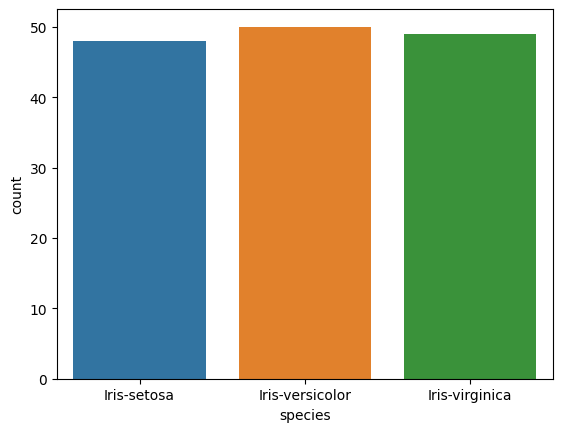

In [82]:
sns.countplot(x = "species", data = df)

<AxesSubplot: xlabel='petal_width', ylabel='Count'>

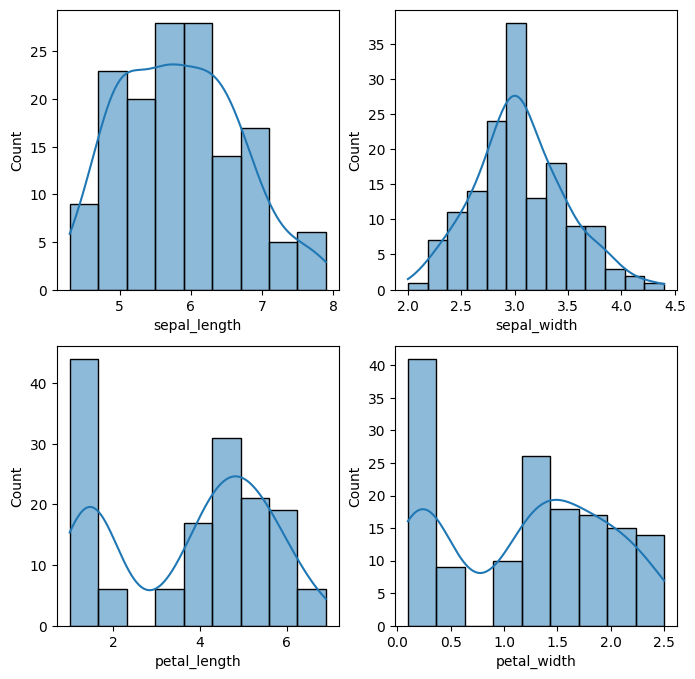

In [70]:
plt.figure(figsize = (8,8))
plt.subplot(2,2,1)
sns.histplot(x = "sepal_length", data = df, kde = True)
plt.subplot(2,2,2)
sns.histplot(x = "sepal_width", data = df,kde = True)
plt.subplot(2,2,3)
sns.histplot(x = "petal_length", data = df,kde = True)
plt.subplot(2,2,4)
sns.histplot(x = "petal_width", data = df,kde = True)

Text(0.5, 1.0, 'Box PLot before Scaling')

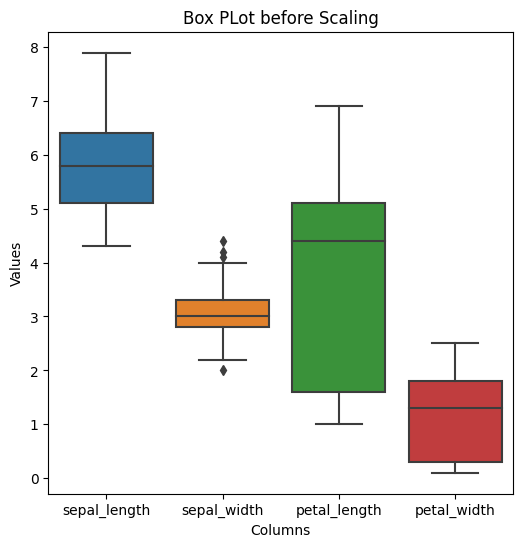

In [97]:
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
df_melted = pd.melt(df[columns],var_name='Columns', value_name='Values')

plt.figure(figsize = (6,6))
sns.boxplot( x = "Columns", y = "Values", data = df_melted)

plt.title("Box PLot before Scaling")

Text(0.5, 1.0, 'Boxplot after Scaling')

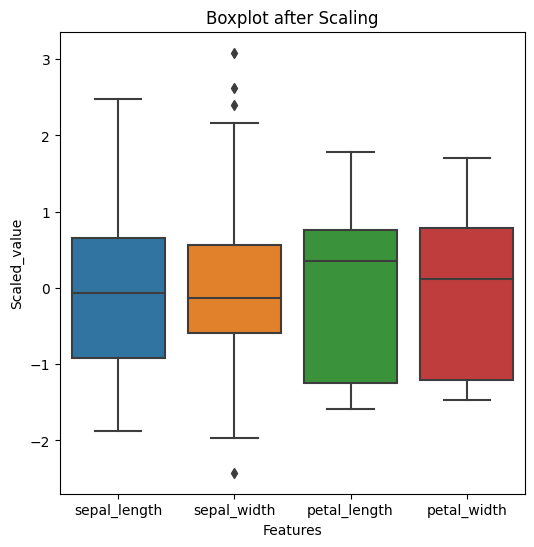

In [96]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[columns])
scaled_df = pd.DataFrame(scaled_df, columns=columns)

melted_scaled_df = pd.melt(scaled_df, var_name = "Features", value_name = 'Scaled_value')

plt.figure(figsize = (6,6))
sns.boxplot( x = "Features", y = "Scaled_value", data = melted_scaled_df)

plt.title("Boxplot after Scaling")


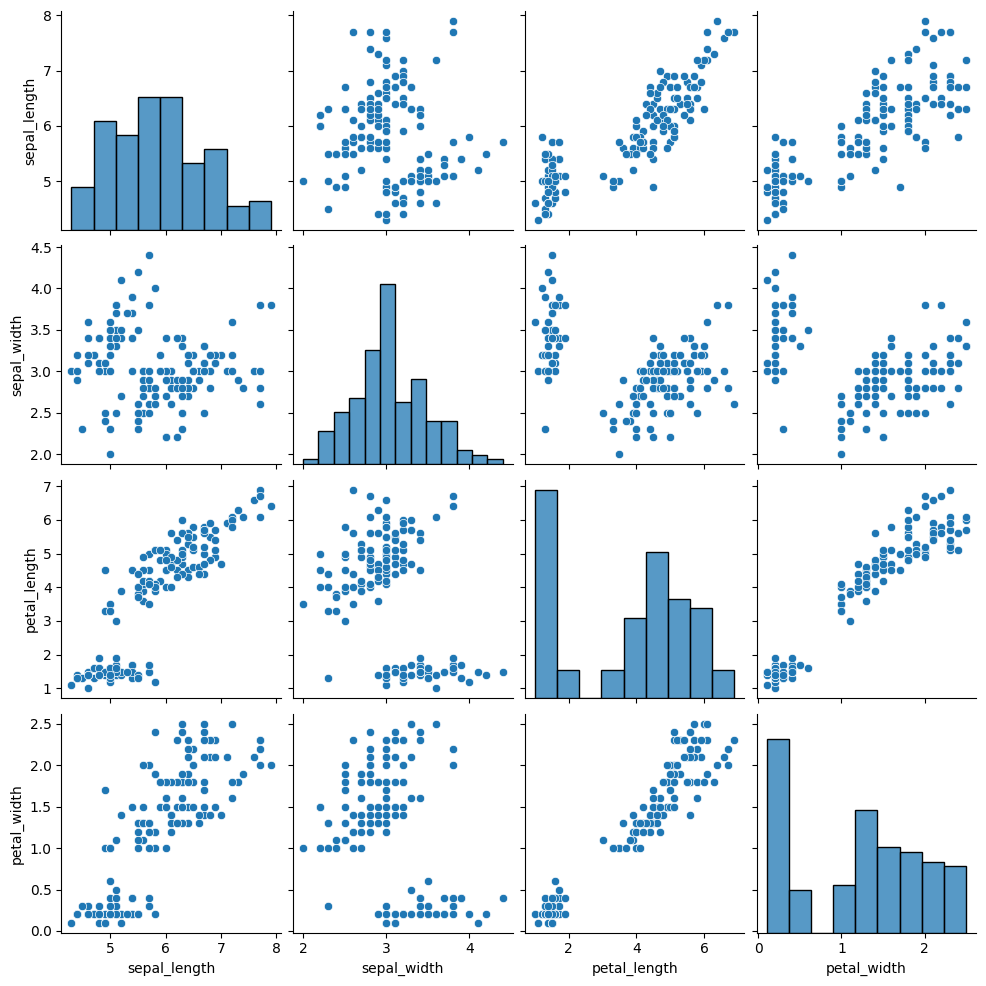

In [20]:
sns.pairplot(df)

C:\Users\rahil\AppData\Local\Temp\ipykernel_8704\3933559928.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

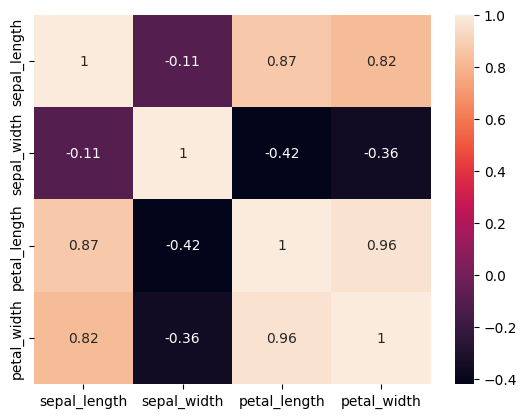

In [22]:
corr = df.corr()
sns.heatmap(corr, annot =True)

In [24]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [26]:
species = {
    'Iris-setosa':     1,
    'Iris-versicolor': 2,
    'Iris-virginica':  3
}

In [27]:
df.species = df.species.map(species)

In [29]:
df.species.value_counts()

1    50
2    50
3    50
Name: species, dtype: int64

In [43]:
X = df.drop("species", axis = 1)
y = df["species"]

In [47]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [48]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int64

In [49]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [54]:

classifier = svm.SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


In [55]:

classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0
